# Evaluate Techniques for Wifi Locationing 

### Objective 

Evaluating the application of machine learning techniques to the problem of indoor locationing via wifi fingerprinting. 

Many real world applications need to know the localization of a user in the world to provide their services. Therefore, automatic user localization has been a hot research topic in the last years. Automatic user localization consists of estimating the position of the user (latitude, longitude and altitude) by using an electronic device, usually a mobile phone. Outdoor localization problem can be solved very accurately thanks to the inclusion of GPS sensors into the mobile devices. However, indoor localization is still an open problem mainly due to the loss of GPS signal in indoor environments. Although, there are some indoor positioning technologies and methodologies, this database is focused on WLAN fingerprint-based ones (also know as WiFi Fingerprinting). 

Although there are many papers in the literature trying to solve the indoor localization problem using a WLAN fingerprint-based method, there still exists one important drawback in this field which is the lack of a common database for comparison purposes. So, UJIIndoorLoc database is presented to overcome this gap. We expect that the proposed database will become the reference database to compare different indoor localization methodologies based on WiFi fingerprinting.

### Summary 

- **Database used:** [Click on database source](http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc)
- **Location:** Universitat Jaume, approximatly 110.000m$^2$ 
- **Date of database creation:** 2013
- **Participants:** 20 users and 25 Android devices
- **Models investigated:** C5.0, SVM/SVR, KNN, LM, Model Trees, RandomForest





## Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import timeit
import math as math
from math import sqrt
import tensorflow as tf

%matplotlib inline 

In [2]:
train_set = pd.read_csv("/Users/peterhoang/Downloads/Ubiqum/UJIndoorLoc/trainingData.csv")
test_set = pd.read_csv("/Users/peterhoang/Downloads/Ubiqum/UJIndoorLoc/validationData.csv")

- The database consists of 19937 training/reference records (trainingData.csv file) 
- 1111 validation/test records(validationData.csv file). 

#### Attribute Information:

The 529 attributes contain the WiFi fingerprint, the coordinates where it was taken, and other useful information. 

Each WiFi fingerprint can be characterized by the detected Wireless Access Points (WAPs) and the corresponding Received Signal Strength Intensity (RSSI). The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. The positive value 100 is used to denote when a WAP was not detected. During the database creation, 520 different WAPs were detected. Thus, the WiFi fingerprint is composed by 520 intensity values. 


- Attribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected. 
- .... 
- Attribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected. 
- Attribute 521 (Longitude): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000 
- Attribute 522 (Latitude): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018. 
- Attribute 523 (Floor): Altitude in floors inside the building. Integer values from 0 to 4. 
- Attribute 524 (BuildingID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2. 
- Attribute 525 (SpaceID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values. 
- Attribute 526 (RelativePosition): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
- Attribute 527 (UserID): User identifier (see below). Categorical integer values. 
- Attribute 528 (PhoneID): Android device identifier (see below). Categorical integer values. 
- Attribute 529 (Timestamp): UNIX Time when the capture was taken. Integer value. 

<u>**Then the coordinates (latitude, longitude, floor) and Building ID are provided as the attributes to be predicted.**</u>


source: [data base information](http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc)

## Evaluate Data

In [3]:
train_set.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
train_set.describe() 

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [ ]:
train_set.isna().sum().sum() #There is no NA in our dataset 

|Building No. | No. Floors | 
|-------------|------------|
|Building 0   | 4 floors   |
|Building 1   | 4 floors   |
|Building 2   | 5 floors   |

```python 
train_set.loc[train_set["BUILDINGID"] == 0]["FLOOR"].unique() 
train_set.loc[train_set["BUILDINGID"] == 1]["FLOOR"].unique() 
train_set.loc[train_set["BUILDINGID"] == 2]["FLOOR"].unique()

```

#### Plotting Longitude and Latitude

In [ ]:
train_set.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(10,7), alpha=0.01)

![Map](https://i.ibb.co/mc1TNGN/Screen-Shot-2019-05-06-at-12-44-57.png "Map")

#### Correlaion between variables

In [5]:
trains_set_nowap = train_set[["LONGITUDE","LATITUDE","FLOOR","BUILDINGID","SPACEID","RELATIVEPOSITION","USERID","PHONEID","TIMESTAMP"]]
trains_set_nowap.corr()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
LONGITUDE,1.000000,-0.860326,0.080836,0.958374,-0.102063,-0.151616,0.347764,-0.072975,0.758565
LATITUDE,-0.860326,1.000000,-0.101685,-0.881269,-0.155612,0.120937,-0.227728,-0.034537,-0.694243
FLOOR,0.080836,-0.101685,1.000000,0.114734,-0.037205,0.161936,-0.185551,0.167536,0.071441
BUILDINGID,0.958374,-0.881269,0.114734,1.000000,-0.129869,-0.149405,0.338069,-0.038654,0.778955
SPACEID,-0.102063,-0.155612,-0.037205,-0.129869,1.000000,0.042184,-0.203930,-0.012862,-0.179500
RELATIVEPOSITION,-0.151616,0.120937,0.161936,-0.149405,0.042184,1.000000,-0.113595,0.034807,-0.227320
USERID,0.347764,-0.227728,-0.185551,0.338069,-0.203930,-0.113595,1.000000,-0.116192,0.130628
PHONEID,-0.072975,-0.034537,0.167536,-0.038654,-0.012862,0.034807,-0.116192,1.000000,-0.029279
TIMESTAMP,0.758565,-0.694243,0.071441,0.778955,-0.179500,-0.227320,0.130628,-0.029279,1.000000


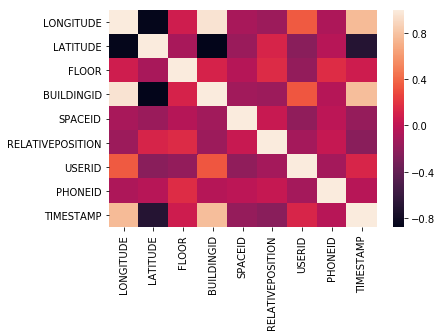

In [6]:
sns.heatmap(train_set[["LONGITUDE","LATITUDE","FLOOR","BUILDINGID","SPACEID","RELATIVEPOSITION","USERID","PHONEID","TIMESTAMP"]].corr())

In [7]:
#train_set.corr().sort_values("BUILDINGID", ascending=False)
#train_set.corr().sort_values("LONGITUDE", ascending=True)
#train_set.corr().sort_values("LATITUDE", ascending=False)
#train_set.corr().sort_values("FLOOR", ascending=False)
train_set.corr()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
WAP001,1.000000,-0.000928,NaN,NaN,-0.001348,-0.003762,-0.005184,0.004170,-0.005263,-0.001990,...,NaN,0.035730,-0.054910,-0.025719,0.043761,0.016777,-0.013458,-0.011642,0.000123,0.063228
WAP002,-0.000928,1.000000,NaN,NaN,-0.001385,-0.003865,-0.005326,-0.005782,-0.005408,-0.002044,...,NaN,0.050326,-0.021718,-0.021374,0.044959,-0.035616,-0.013827,0.049948,-0.005633,0.020383
WAP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP005,-0.001348,-0.001385,NaN,NaN,1.000000,-0.005610,-0.007731,-0.008393,-0.007850,-0.002968,...,NaN,-0.054699,0.048553,-0.042142,-0.042362,0.008474,0.043336,-0.023651,0.020221,-0.024054
WAP006,-0.003762,-0.003865,NaN,NaN,-0.005610,1.000000,-0.021578,-0.023427,-0.021910,-0.008283,...,NaN,-0.040726,-0.011470,0.140161,0.018083,-0.146094,0.084678,0.037283,0.134668,-0.066426
WAP007,-0.005184,-0.005326,NaN,NaN,-0.007731,-0.021578,1.000000,-0.032282,0.103699,-0.011414,...,NaN,0.261428,-0.139173,0.119614,0.251028,-0.199881,-0.062160,-0.066782,0.000703,0.437413
WAP008,0.004170,-0.005782,NaN,NaN,-0.008393,-0.023427,-0.032282,1.000000,-0.032779,-0.012392,...,NaN,0.114271,-0.221562,0.106331,0.089323,0.129147,0.073497,-0.034706,0.007552,-0.040802
WAP009,-0.005263,-0.005408,NaN,NaN,-0.007850,-0.021910,0.103699,-0.032779,1.000000,-0.011589,...,NaN,0.264517,-0.172479,-0.045903,0.254893,-0.209836,-0.073372,0.131440,-0.017822,0.227793
WAP010,-0.001990,-0.002044,NaN,NaN,-0.002968,-0.008283,-0.011414,-0.012392,-0.011589,1.000000,...,NaN,0.020500,0.015375,-0.003391,0.016908,0.131951,0.011871,-0.002092,-0.068594,-0.035154


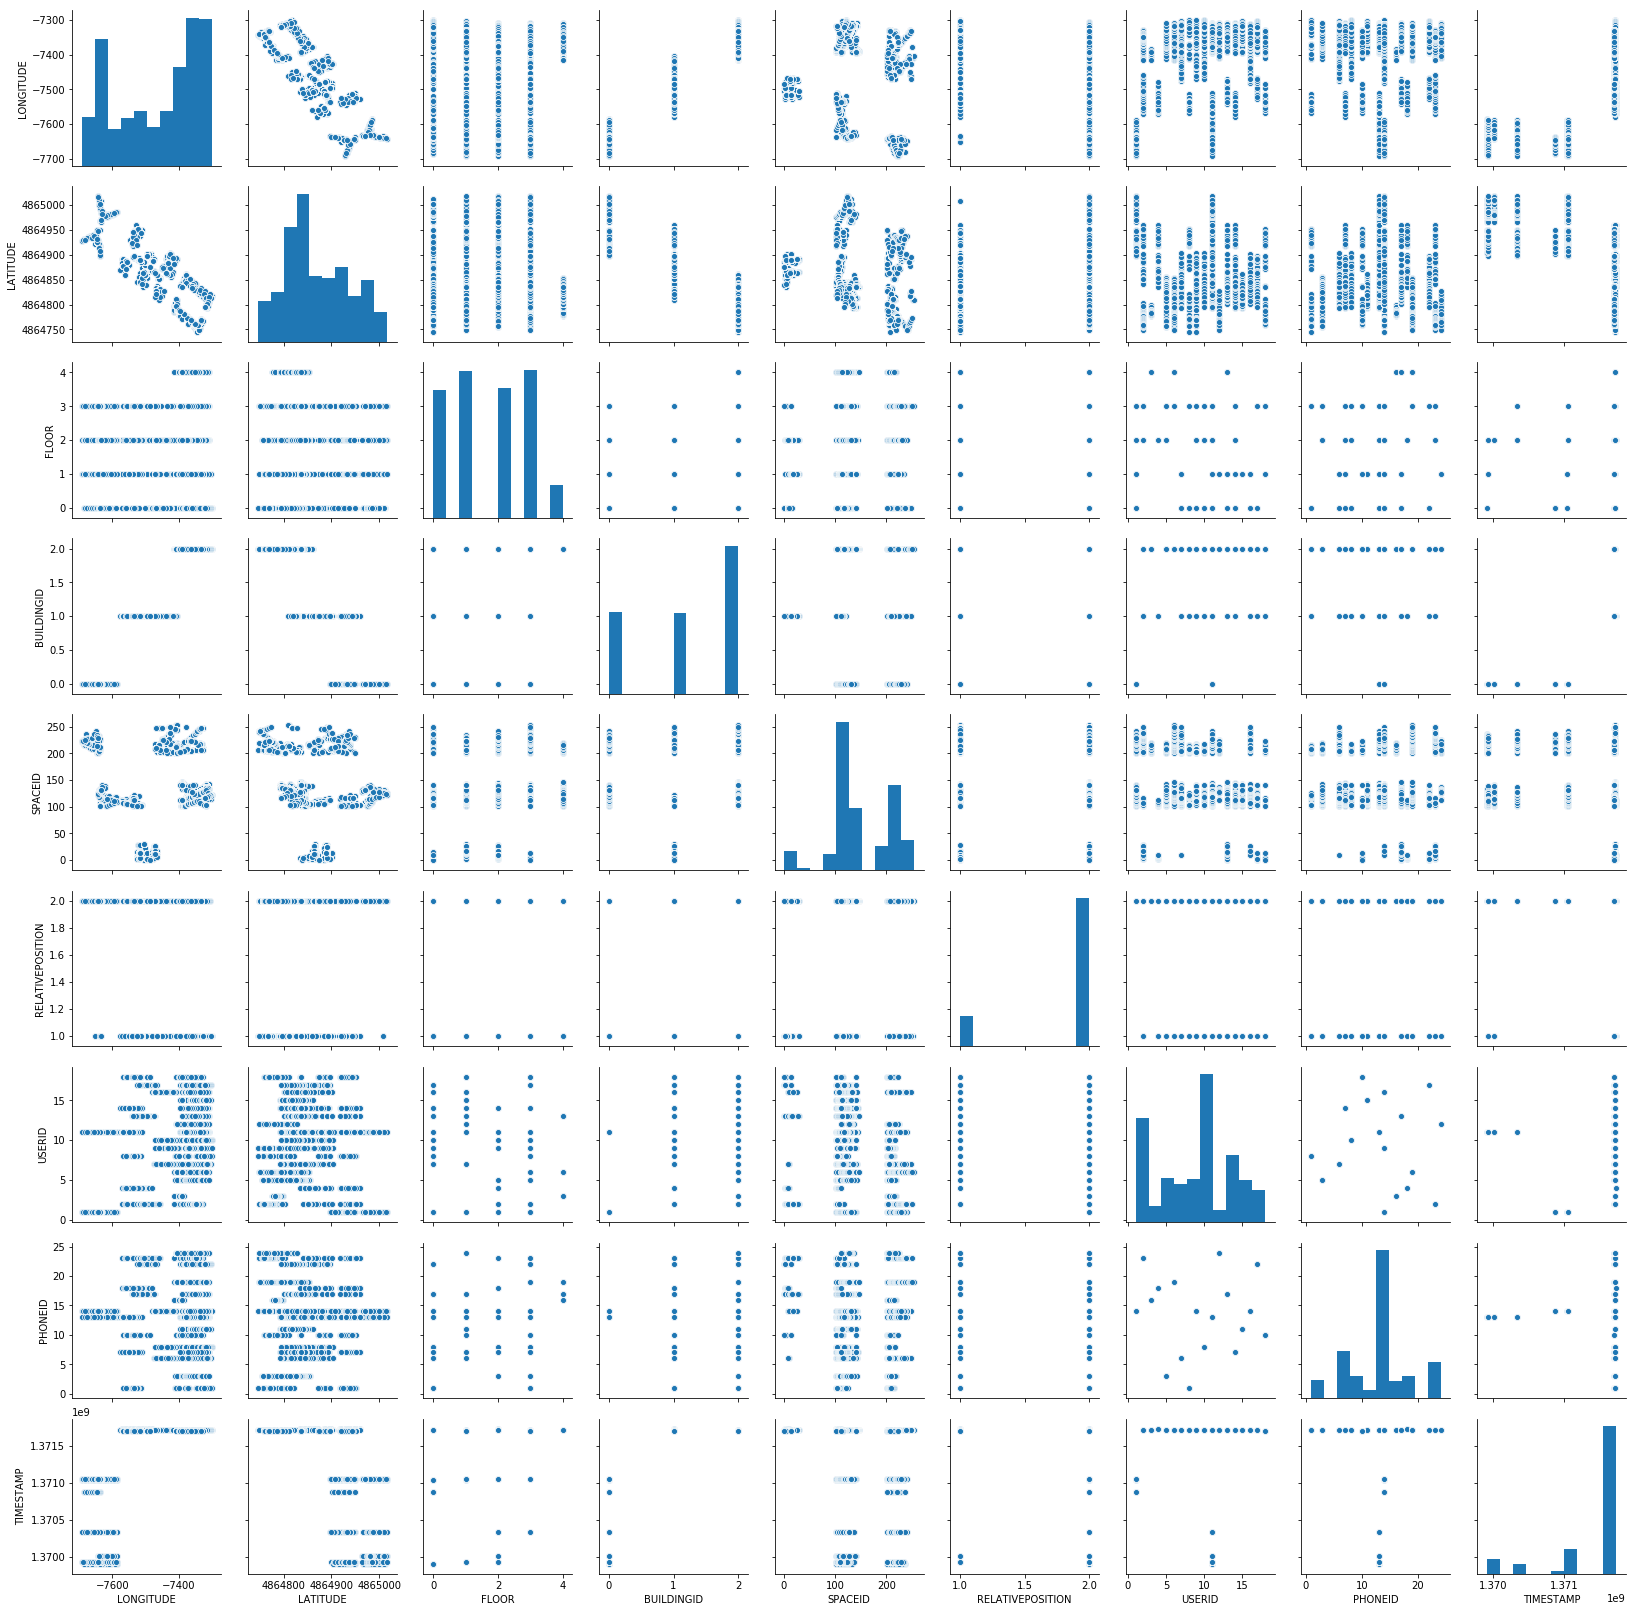

In [8]:
sns.pairplot(trains_set_nowap)

## Pre-proccessing Data

In [9]:
# Fingerprint data representation: positive-value representation for all WAPs.
# Original representation: -104 to 0 (weak to strong), 100 for no signal.
# New represenation: 1 to 105 (weak to strong), 0 for no signal.
train_set.iloc[:, 0:520].min().min() # minimum WAP is -104 dBm
train_set_copy = train_set.copy()
train_set_copy.iloc[:, 0:520] = np.where(train_set_copy.iloc[:, 0:520] <= 0, 
                train_set_copy.iloc[:, 0:520] + 105, 
                train_set_copy.iloc[:, 0:520] - 100)

test_set.iloc[:, 0:520].min().min() # minimum WAP is -104 dBm
test_set_copy = test_set.copy()
test_set_copy.iloc[:, 0:520] = np.where(test_set_copy.iloc[:, 0:520] <= 0, 
                test_set_copy.iloc[:, 0:520] + 105, 
                test_set_copy.iloc[:, 0:520] - 100)

In [10]:
#Removing Columns
clean = train_set_copy[((train_set_copy.iloc[:, 0:520].sum(axis=1)) != 0)]
valid = test_set_copy[((test_set_copy.iloc[:, 0:520].sum(axis=1)) != 0)]

In [12]:
clean = clean[clean.columns[clean.sum() != 0 ]]

In [11]:
clean.drop(["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], axis=1, inplace= True)
valid.drop(["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], axis=1, inplace= True)

/Users/peterhoang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
clean.head()

In [ ]:
clean = clean.drop_duplicates(keep=False)

#### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(clean) 

In [ ]:
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
clean.head()

variancia analyses 
PCA

#### Train and split

In [13]:
from sklearn.model_selection import train_test_split 

In [ ]:
X = clean.drop(["BUILDINGID","FLOOR","LONGITUDE","LATITUDE"],axis=1)
y = clean["FLOOR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X = clean.drop(["BUILDINGID","FLOOR","LONGITUDE","LATITUDE"],axis=1)
y = clean["LONGITUDE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X = clean.drop(["BUILDINGID","FLOOR","LONGITUDE","LATITUDE"],axis=1)
y = clean["LATITUDE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<u>KNN MODEL</u>

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knn = KNeighborsRegressor(n_neighbors=5)

In [17]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
knn_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
print(r2_score(y_test, knn_pred))
print("\n")
print(mean_squared_error(y_test, knn_pred))

0.9974394866085138


11.454372112146224


In [22]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

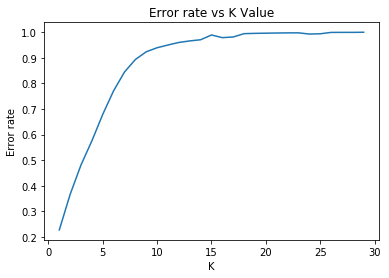

In [24]:
plt.figure()
plt.plot(range(1,30), error_rate)
plt.title("Error rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [34]:
K_start = timeit.default_timer()

K_rmse_val = [] # to store rmse values for different k
K_r2_val = [] # to store r2 values for different k

for K in range(10):
    
    K = K + 1
    KNN = KNeighborsRegressor(n_neighbors=K)
    KNN.fit(X_train, y_train)  #fit the model
    pred_K = knn.predict(X_test) #make prediction on test set
    KNN_error = sqrt(mean_squared_error(y_test, pred_K)) #calculate rmse
    KNN_r2 = r2_score(y_test, pred_K)
    K_rmse_val.append(KNN_error) #store rmse values
    K_r2_val.append(KNN_r2) #store r2 values

    print('Value (KNN_ALL_FL) for k=',KNN,'is:')    
    print('RMSE   :', KNN_error)
    print('Rsqaure:', KNN_r2)

K_stop = timeit.default_timer()
print ()
K_t = (K_stop - K_start)/60
print('Time in min: ', round(K_t, 3))

Value (KNN_ALL_FL) for k= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform') is:
RMSE   : 6.337160515494229
Rsqaure: 0.9910227115643266
Value (KNN_ALL_FL) for k= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform') is:
RMSE   : 6.337160515494229
Rsqaure: 0.9910227115643266
Value (KNN_ALL_FL) for k= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform') is:
RMSE   : 6.337160515494229
Rsqaure: 0.9910227115643266
Value (KNN_ALL_FL) for k= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform') is:
RMSE   : 6.337160515494229
Rsqaure: 0.9910227115643266
Valu

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

In [ ]:
X = valid.drop(["BUILDINGID","FLOOR","LONGITUDE","LATITUDE"],axis=1)
y = valid["FLOOR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
prediction = knn.predict(X_train)

In [ ]:
print(confusion_matrix(y_test, valid))
print('\n')
print(classification_report(y_test, valid))

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
print(r2_score(y_test, dtree_pred))
print("\n")
print(mean_squared_error(y_test, dtree_pred))

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators=200)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(r2_score(y_test, rfc_pred))
print("\n")
print(mean_squared_error(y_test, rfc_pred))

### SVM 

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
print(r2_score(y_test, svm_pred))
print("\n")
print(mean_squared_error(y_test, svm_pred))

### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor 

In [ ]:
MLP = MLPRegressor()

In [ ]:
MLP.fit(X_train, y_train)

In [ ]:
MPL_pred = MLP.predict(X_test)

In [ ]:
print(r2_score(y_test, MPL_pred))
print("\n")
print(mean_squared_error(y_test, MPL_pred))